In [367]:
# Import libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

## Data Cleaning

In [328]:
# import dataset
df = pd.read_csv('STRIKE_REPORTS.csv')

# View dataframe
pd.set_option('display.max_columns', None)
df.head()

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_22253/3535943591.py:2: DtypeWarning:

Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.



,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,NaN,CA,AWP,NaN,NaN,UAL,UNITED AIRLINES,NaN,1768.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,NaN,CO,ANM,NaN,NaN,UAL,UNITED AIRLINES,NaN,1845.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,NaN,NE,ACE,NaN,NaN,UAL,UNITED AIRLINES,NaN,306.0,B-757-200,148,26,34.0,40.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,NaN,DC,AEA,NaN,NaN,UAL,UNITED AIRLINES,NaN,510.0,A-320,04A,03,23.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Approach,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,"ON FINAL APCH, STRIKE UNDER THE NOSE OF THE CO...",False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,NaN,NY,AEA,NaN,NaN,UAL,UNITED AIRLINES,NaN,677.0,A-320,04A,03,23.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Climb,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,M,False,False,False,False,False,False,True,False,False,False,False,False,False,F

In [329]:
# Reset display option
pd.reset_option('display.max_columns')

In [330]:
# Size of the dataframe
df.shape

(288810, 100)

In [331]:
# Review the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

In [333]:
# Display all rows
pd.set_option('display.max_rows', None)

# View the percentage and volume of null values
null_summary = pd.DataFrame({
    'Total missing values': df.isnull().sum(),
    'Percentage missing values': round(df.isnull().mean() * 100, 2)
})
sorted_null_summary = null_summary.sort_values(by= 'Percentage missing values', ascending=False)

sorted_null_summary

,Total missing values,Percentage missing values
NR_FATALITIES,288786,99.99
NR_INJURIES,288534,99.90
BIRD_BAND_NUMBER,288420,99.86
EFFECT_OTHER,286589,99.23
ENG_4_POS,285520,98.86
COST_OTHER_INFL_ADJ,284050,98.35
COST_OTHER,284050,98.35
ENROUTE_STATE,283773,98.26
COST_REPAIRS_INFL_ADJ,283770,98.25
COST_REPAIRS,283770,98.25


In [334]:
pd.reset_option('display.max_rows')

In [335]:
# Drop columns based on the percentage of null values and relevance to the analysis. 
df = df.drop(columns=['BIRD_BAND_NUMBER', 'EFFECT_OTHER', 'COST_OTHER_INFL_ADJ', 'COST_OTHER', 'ENROUTE_STATE', 'COST_REPAIRS_INFL_ADJ', 'AOS', 'LOCATION',
              'OTHER_SPECIFY', 'REG', 'AMA', 'FLT', 'COMMENTS', 'REMARKS', 'PERSON', 'REPORTED_NAME', 'REPORTED_TITLE', 'RUNWAY', 'SOURCE', 'LUPDATE',
              'INGESTED_OTHER', 'TRANSFER'])

In [336]:
# Add struck flag column to the dataframe
df['INDICATED_STRUCK'] = df['STR_ENG1'] | df['STR_ENG2']  | df['STR_ENG3'] | df['STR_ENG4'] | df['STR_RAD'] | df['STR_FUSE'] | df['STR_LG'] | df['STR_LGHTS'] | df['STR_NOSE'] | df['STR_OTHER'] | df['STR_PROP'] | df['STR_RAD'] | df['STR_TAIL'] | df['STR_WINDSHLD'] | df['STR_WING_ROT']

In [338]:
# Convert int column to string
df[['EMA', 'EMO']] = df[['EMA', 'EMO']].astype(str)

In [339]:
# Review df engine structure
df_engine = df[['NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'STR_ENG1', 'STR_ENG2','STR_ENG3', 'STR_ENG4', 'DAM_ENG1',
                   'DAM_ENG2', 'DAM_ENG3', 'DAM_ENG4', 'ING_ENG1', 'ING_ENG2', 'ING_ENG3', 'ING_ENG4']]
df_engine

,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,STR_ENG1,STR_ENG2,STR_ENG3,STR_ENG4,DAM_ENG1,DAM_ENG2,DAM_ENG3,DAM_ENG4,ING_ENG1,ING_ENG2,ING_ENG3,ING_ENG4
0,2.0,1.0,1.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
1,2.0,1.0,1.0,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,1.0,NaN,NaN,False,True,False,False,False,False,False,False,False,False,False,False
3,2.0,1.0,1.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,1.0,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288805,2.0,1.0,1.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
288806,2.0,5.0,5.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
288807,2.0,5.0,5.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
288808,2.0,4.0,4.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False


In [341]:
# Replace False with NaN where engine positions are NaN
for i in range(1, 5):
    pos_col = f'ENG_{i}_POS'
    for status in ['STR', 'DAM', 'ING']:
        status_col = f'{status}_ENG{i}'
        df[status_col] = df.apply(lambda row: np.nan if pd.isna(row[pos_col]) else row[status_col], axis=1)

# View modified dataframe
df.head()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SPECIES,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,INDICATED_STRUCK
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True


In [342]:
# Identify duplicates
df_duplicate = df[df.duplicated()]
df_duplicate

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SPECIES,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,INDICATED_STRUCK


## EDA

In [343]:
# Review descriptive analytics of the dataset
df.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,COST_REPAIRS,NR_INJURIES,NR_FATALITIES
count,2.888100e+05,288810.000000,288810.000000,2.533090e+05,253308.000000,206490.000000,206259.000000,205481.000000,191612.000000,13080.000000,3290.000000,148807.000000,94237.000000,188234.000000,2.888100e+05,276.000000,24.000000
mean,8.736693e+05,7.175974,2011.697798,2.012754e+02,-90.880247,3.538312,2.013929,2.814956,2.667536,2.900306,2.043161,865.960358,142.585057,0.814466,2.375638e+03,1.293478,2.041667
std,2.526448e+05,2.765082,8.432311,8.177522e+04,327.243918,0.867312,0.420133,2.113806,1.981032,1.950649,1.435114,1843.098801,46.650050,3.547950,1.099087e+05,0.756134,1.654484
min,6.082420e+05,1.000000,1990.000000,-3.767333e+01,-177.381000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,6.893202e+05,5.000000,2006.000000,3.298764e+01,-98.469780,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000e+00,1.000000,1.000000
50%,7.646935e+05,7.000000,2014.000000,3.880581e+01,-87.904460,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,0.000000,0.000000e+00,1.000000,1.500000
75%,1.064714e+06,9.000000,2019.000000,4.085010e+01,-80.417940,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000,900.000000,160.000000,0.000000,0.000000e+00,1.000000,2.000000
max,1.472259e+06,12.000000,2023.000000,4.115443e+07,164140.000000,5.000000,4.000000,7.000000,7.000000,6.000000,5.000000,31300.000000,1250.000000,99.000000,3.600000e+07,7.000000,8.000000


In [344]:
# Capture a sample of the data
df_sample = df.sample(10000)

# Explore the sampled dataset by using ydata_profiling tool
profile = ProfileReport(df_sample, title=" Aircraft Collision Profiling Report")

# View ydata_profile results 
profile.to_file("aircraft_collision_profiling_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 133.14it/s]


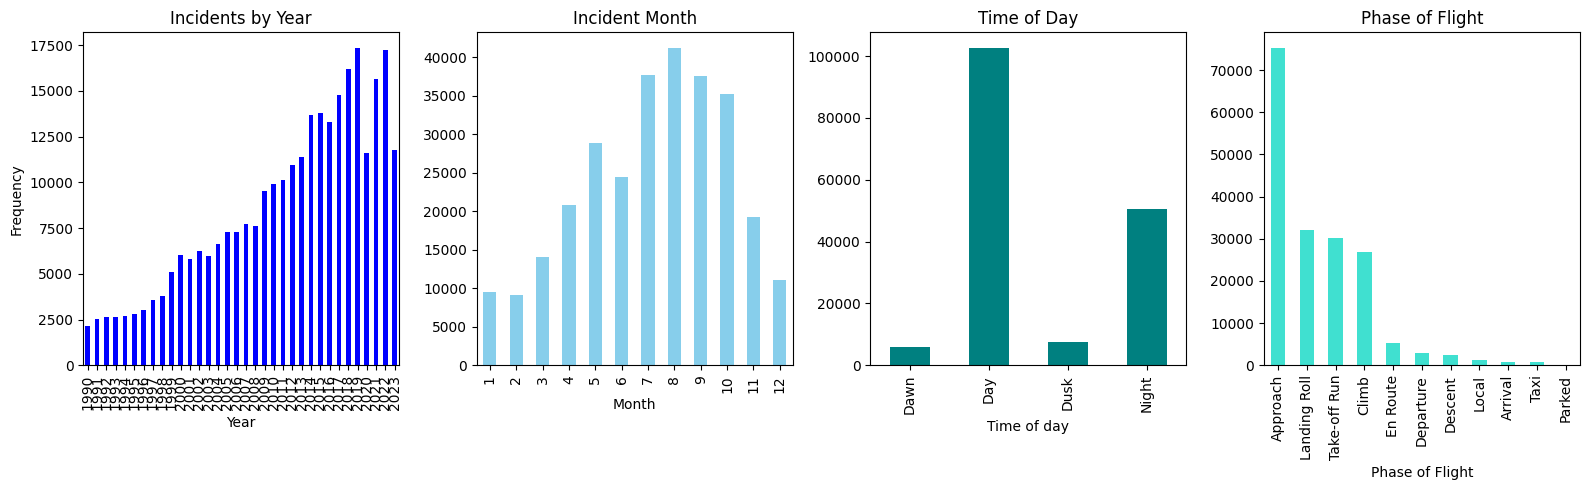

<Figure size 640x480 with 0 Axes>

In [345]:
# Plot figure
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Plot incident year 
df['INCIDENT_YEAR'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Incidents by Year')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Year')

# Plot incident month
df['INCIDENT_MONTH'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title('Incident Month')
axs[1].set_xlabel('Month')

# Plot incident time of day
df['TIME_OF_DAY'].value_counts().sort_index().plot(kind='bar', ax=axs[2], color='teal')
axs[2].set_title('Time of Day')
axs[2].set_xlabel('Time of day')

# Plot the phase of the flight
df['PHASE_OF_FLIGHT'].value_counts().plot(kind='bar', ax=axs[3], color='turquoise')
axs[3].set_title('Phase of Flight')
axs[3].set_xlabel('Phase of Flight')

plt.tight_layout()
plt.show()
plt.clf()

In [346]:
pd.set_option('display.max_columns', None)
df.head()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,STATE,FAAREGION,OPID,OPERATOR,AIRCRAFT,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,COST_REPAIRS,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,EFFECT,SPECIES_ID,SPECIES,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,INDICATED_STRUCK
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,CA,AWP,UAL,UNITED AIRLINES,B-737-300,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,0,False,NaN,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,UNKBM,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,CO,ANM,UAL,UNITED AIRLINES,B-737-300,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,0,False,NaN,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,UNKBM,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,NE,ACE,UAL,UNITED AIRLINES,B-757-200,26,34.0,40.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,0,False,N,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,UNKBM,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,DC,AEA,UAL,UNITED AIRLINES,A-320,03,23.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Approach,1000.0,NaN,NaN,NaN,NaN,0,False,N,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,UNKBM,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,NY,AEA,UAL,UNITED AIRLINES,A-320,03,23.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Climb,5000.0,NaN,NaN,NaN,NaN,0,True,M,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,True,False,False,False,False,False,False,False,False,NaN,UNKBM,Unknown bird - medium,False,False,Unknown,NaN,1,Medium,NaN,NaN,True


In [156]:
# Return the top 25 airports 
top_airports = df['AIRPORT'].value_counts().nlargest(25).reset_index()
top_airports.columns = ['AIRPORT', 'COUNT']

# Build the airport treemap
fig = px.treemap(
    data_frame=top_airports,
    path= ['AIRPORT'],
    values='COUNT',
    title='Top 25 Airports with wildlife collisions',
    color='COUNT',
    color_continuous_scale='electric')
fig.update_layout(
    coloraxis_colorbar=dict(title='Volume'),
    height=500,
    template='ggplot2',
)

# Show figure
fig.show()

In [155]:
# Return the top 25 airports 
top_airports = df['STATE'].value_counts().nlargest(25).reset_index()
top_airports.columns = ['STATE', 'COUNT']

# Build the airport treemap
fig = px.treemap(
    data_frame=top_airports,
    path= ['STATE'],
    values='COUNT',
    title='Top 25 State with wildlife collisions',
    color='COUNT',
    color_continuous_scale='electric')
fig.update_layout(
    coloraxis_colorbar=dict(title='Volume'),
    height=500,
    template='ggplot2')
# Show figure
fig.show()

In [157]:
# Return the top 25 airports 
top_airports = df['OPERATOR'].value_counts().nlargest(25).reset_index()
top_airports.columns = ['OPERATOR', 'COUNT']

# Build the airport treemap
fig = px.treemap(
    data_frame=top_airports,
    path= ['OPERATOR'],
    values='COUNT',
    title='Top 25 flight operators with wildlife collisions',
    color='COUNT',
    color_continuous_scale='electric')
fig.update_layout(
    coloraxis_colorbar=dict(title='Volume'),
    height=500,
    template='ggplot2')
# Show figure
fig.show()

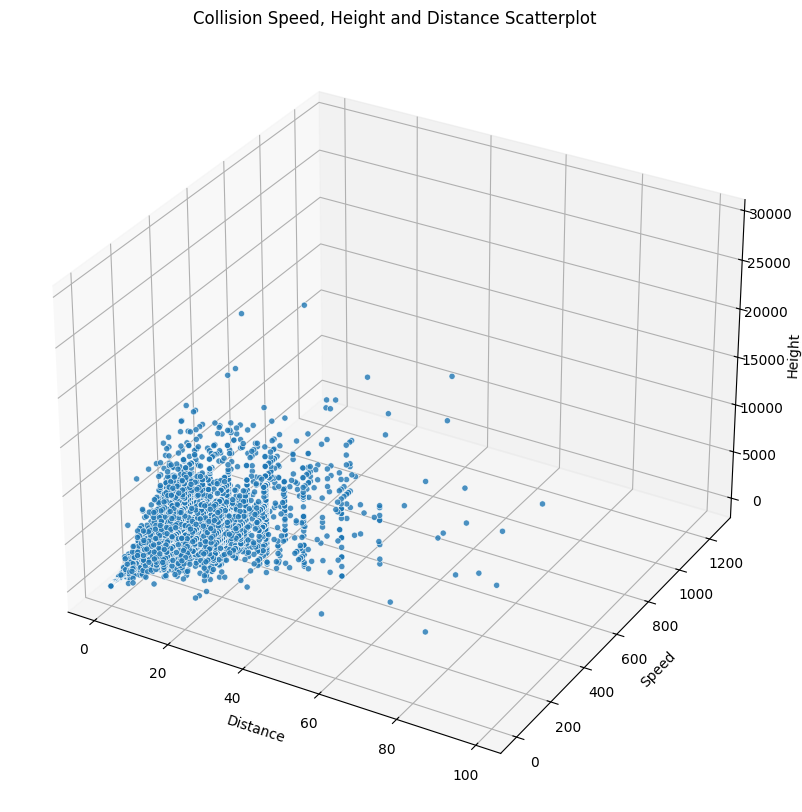

<Figure size 640x480 with 0 Axes>

In [214]:
# Build a 3d plot of demonstrating the speed, height and distance collisions occur
x_data = df['DISTANCE']
y_data = df['SPEED']
z_data = df['HEIGHT']

fig = plt.figure(figsize=(12, 10))  

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, s=20, alpha=0.8, edgecolors='w', linewidth=0.5)
ax.set_xlabel('Distance')
ax.set_ylabel('Speed')
ax.set_zlabel('Height')
ax.set_title('Collision Speed, Height and Distance Scatterplot')

plt.show()
plt.clf()

Text(0.5, 0, 'Size')

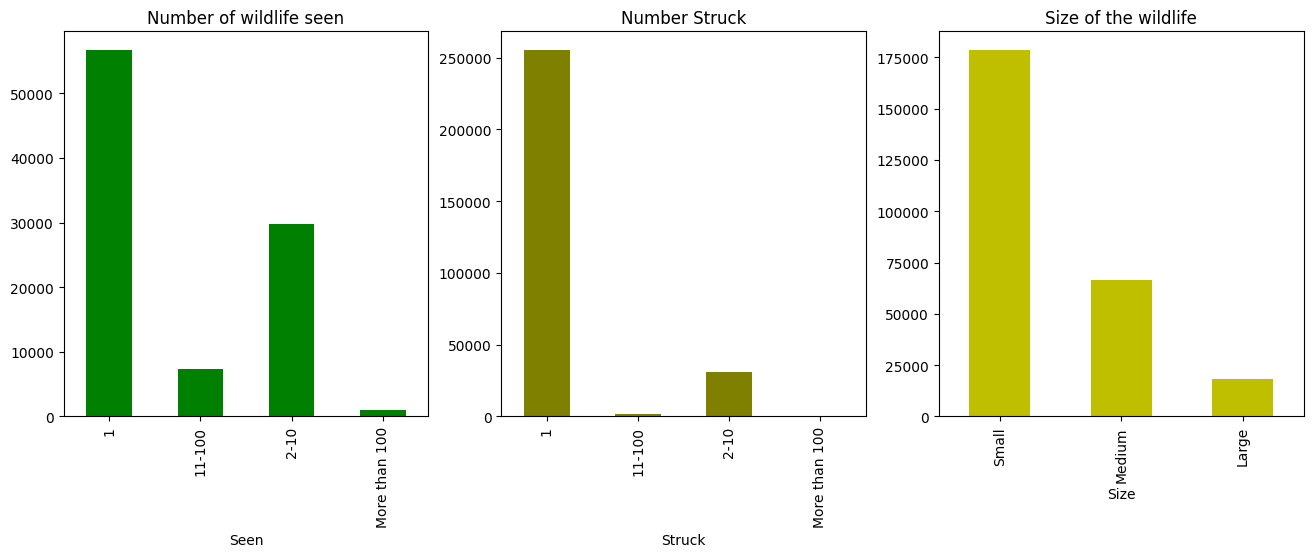

In [227]:
# Plot figure
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

# Number of wildlife seen 
df['NUM_SEEN'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='green')
axs[0].set_title('Number of wildlife seen')
axs[0].set_xlabel('Seen')

# Plot incident month
df['NUM_STRUCK'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color='olive')
axs[1].set_title('Number Struck')
axs[1].set_xlabel('Struck')

# Plot incident time of day
df['SIZE'].value_counts().plot(kind='bar', ax=axs[2], color='y')
axs[2].set_title('Size of the wildlife')
axs[2].set_xlabel('Size')

In [231]:
# Return the top 25 specis 
top_airports = df['SPECIES'].value_counts().nlargest(25).reset_index()
top_airports.columns = ['SPECIES', 'COUNT']

# Build the species treemap
fig = px.treemap(
    data_frame=top_airports,
    path= ['SPECIES'],
    values='COUNT',
    title='Top 25 species involved in a collisions',
    color='COUNT',
    color_continuous_scale='greens')
fig.update_layout(
    coloraxis_colorbar=dict(title='Volume'),
    height=500,
    template='ggplot2')
# Show figure
fig.show()

In [232]:
df_engine = df[['NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'STR_ENG1', 'STR_ENG2','STR_ENG3', 'STR_ENG4', 'DAM_ENG1',
                   'DAM_ENG2', 'DAM_ENG3', 'DAM_ENG4', 'ING_ENG1', 'ING_ENG2', 'ING_ENG3', 'ING_ENG4']]
df_engine

,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,STR_ENG1,STR_ENG2,STR_ENG3,STR_ENG4,DAM_ENG1,DAM_ENG2,DAM_ENG3,DAM_ENG4,ING_ENG1,ING_ENG2,ING_ENG3,ING_ENG4
0,2.0,1.0,1.0,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
1,2.0,1.0,1.0,NaN,NaN,True,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
2,2.0,1.0,1.0,NaN,NaN,False,True,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
3,2.0,1.0,1.0,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
4,2.0,1.0,1.0,NaN,NaN,True,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288805,2.0,1.0,1.0,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
288806,2.0,5.0,5.0,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
288807,2.0,5.0,5.0,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN
288808,2.0,4.0,4.0,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN,False,False,NaN,NaN


/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_22253/594635513.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_22253/594635513.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_22253/594635513.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_22253/594635513.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



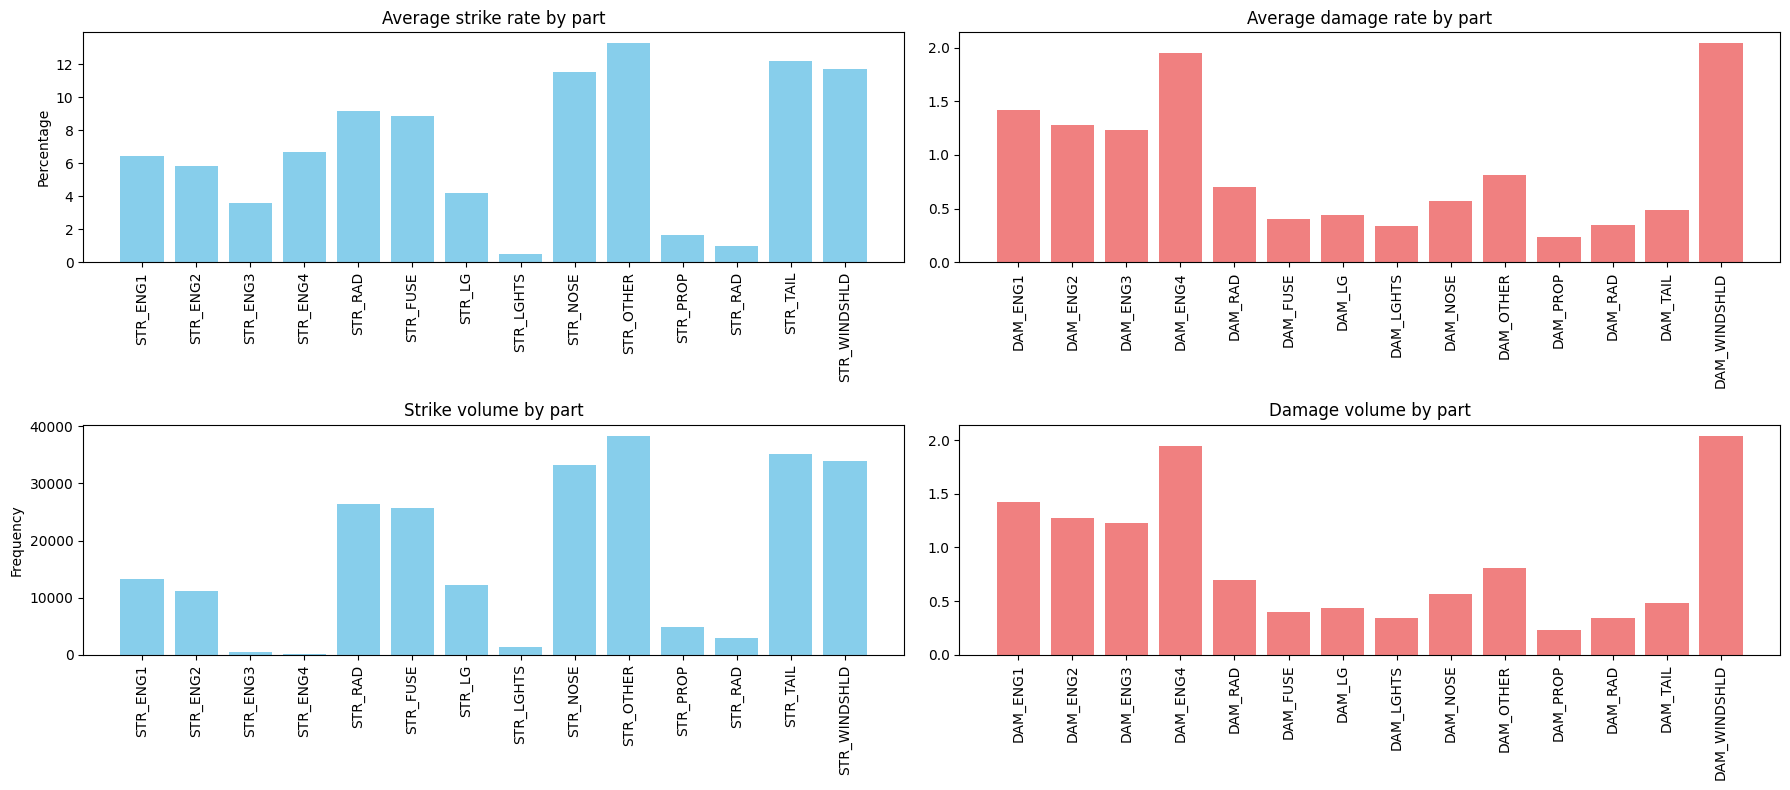

In [320]:
# Parts struck & damaged dataframes
df_part_struck = df[['STR_ENG1','STR_ENG2','STR_ENG3','STR_ENG4','STR_RAD','STR_FUSE','STR_LG','STR_LGHTS','STR_NOSE','STR_OTHER','STR_PROP','STR_RAD','STR_TAIL','STR_WINDSHLD','STR_WING_ROT']]
df_part_dam = df[['DAM_ENG1', 'DAM_ENG2','DAM_ENG3','DAM_ENG4','DAM_RAD','DAM_FUSE','DAM_LG','DAM_LGHTS','DAM_NOSE','DAM_OTHER','DAM_PROP','DAM_RAD','DAM_TAIL','DAM_WINDSHLD','DAM_WING_ROT']]

# Mean and count of each column
df_parts_struck_mean = df_part_struck.mean() * 100
df_parts_dam_mean = df_part_dam.mean() * 100
df_parts_struck_count = df_part_struck.sum()
df_parts_dam_count = df_part_struck.sum()

#Plot figure
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

#  Plot strike percentage
axs[0, 0].bar(df_parts_struck_mean.index , df_parts_struck_mean, color='skyblue')
axs[0, 0].set_title('Average strike rate by part')
axs[0, 0].set_xticklabels(df_parts_struck_mean.index, rotation=90)
axs[0, 0].set_ylabel('Percentage')

# Plot strike volume
axs[1, 0].bar(df_parts_struck_count.index , df_parts_struck_count, color='skyblue')
axs[1, 0].set_title('Strike volume by part')
axs[1, 0].set_xticklabels(df_parts_struck_count.index, rotation=90)
axs[1, 0].set_ylabel('Frequency')

# Plot damage percentage
axs[0, 1].bar(df_parts_dam_mean.index , df_parts_dam_mean, color='lightcoral')
axs[0, 1].set_title('Average damage rate by part')
axs[0, 1].set_xticklabels(df_parts_dam_mean.index, rotation=90)

# Plot damage volume
axs[1, 1].bar(df_parts_dam_mean.index , df_parts_dam_mean, color='lightcoral')
axs[1, 1].set_title('Damage volume by part')
axs[1, 1].set_xticklabels(df_parts_dam_mean.index, rotation=90)

plt.tight_layout()
plt.show()

## Correlations

In [376]:
# Crosstab between warning and struck indicator
c_table_warned_damage = pd.crosstab(df['WARNED'], df['INDICATED_DAMAGE'])

# Chi-square test 
chi2, p, dof, expected = stats.chi2_contingency(c_table_warned_damage)

# Print results
print('Cross Tabulation warned & indicated damage')
print(c_table_warned_damage)

# Expected frequency
expected_result = pd.DataFrame(expected, index=c_table_warned_damage.index, columns=c_table_warned_damage.columns)
print("\nExpected Frequencies for Perfect Independence:")
print(expected_result)

# print chi-quare and p-value
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)

Cross Tabulation warned & indicated damage
INDICATED_DAMAGE   False  True 
WARNED                         
No                 54331   7314
Unknown           167694   8533
Yes                47043   3895

Expected Frequencies for Perfect Independence:
INDICATED_DAMAGE          False         True 
WARNED                                       
No                 57431.172259   4213.827741
Unknown           164180.763949  12046.236051
Yes                47456.063793   3481.936207

Chi-Square Statistic: 3600.5862988383888
p-value: 0.0


Takeaway
- Based on the chi-square test, the discrepency between the observed and expectations frequency is very low
- The significant association between warnings and indicated damage means that the 'WARNED' variable provides valuable information about the likelihood of INDICATED_DAMAGE. This insight could be useful for improving warning systems and mitigating damage effectively.

In [378]:
# Crosstab between effect column and wildlife size column
c_table_effect_size = pd.crosstab(df['EFFECT'], df['SIZE'])

# Chi-square test 
chi2, p, dof, expected = stats.chi2_contingency(c_table_effect_size)

# Print results
print('Cross Tabulation warned & indicated damage')
print(c_table_effect_size)

# Expected frequency
expected_result = pd.DataFrame(expected, index=c_table_effect_size.index, columns=c_table_effect_size.columns)
print("\nExpected Frequencies for Perfect Independence:")
print(expected_result)

# print chi-quare and p-value
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)

Cross Tabulation warned & indicated damage
SIZE                                           Large  Medium  Small
EFFECT                                                             
Aborted Take-off                                 615    1087   1132
Aborted Take-off, Engine Shutdown                  6      15      6
Aborted Take-off, Other                            2       1      1
Engine Shutdown                                   98      80     61
Engine Shutdown, Other                             1       4      4
Engine Shutdown, Other, Precautionary Landing     14      24      3
Engine Shutdown, Precautionary Landing            74     109     28
None, Precautionary Landing                        0       0      1
Other                                            825     541    343
Other, Precautionary Landing                      77     114     99
Precautionary Landing                           1665    2881   2589

Expected Frequencies for Perfect Independence:
SIZE                     

Takeaway
- There is a statistically significant association between the 'SIZE' of the wildlife and the 'EFFECT' of the incident
- Aborted Take-off: Observed counts are lower for encounters with Large wildlife (615) compared to the expected count (765.63), but higher for Medium (1087) and Small wildlife (1132) compared to their respective expected counts (1100.95 for Medium and 967.41 for Small)
- Implementing specific safety measures and protocols based on wildlife size can enhance incident management and mitigation efforts
- Focused strategies for dealing with Medium and Small wildlife, which show higher-than-expected instances of certain incident types, can improve overall safety and reduce the risk of severe outcomes
